In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [34]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [36]:
X = df.iloc[:,-1:]
Y = df.iloc[:,:-1]

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=200)
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [38]:
#1.Find the linear regression equation for this data.
r_i = regressor.intercept_
r_c = regressor.coef_


print('Linear Regression Equation: y = ',round(r_c[0][0],3),'* x +',round(r_i[0],3))

Linear Regression Equation: y =  0.213 * x + -0.468


Linear Regression Equation: **y =  0.213 * x + -0.468**


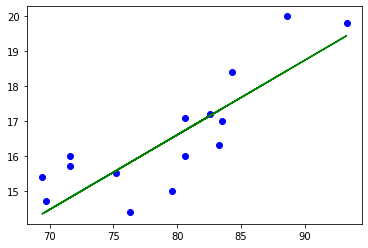

In [ ]:
#2.Chart the original data and the equation on the chart.
plt.scatter(X,Y,color='blue')
plt.plot(X,regressor.predict(X),color='green')
plt.show()

In [ ]:
#3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
print(regressor.score(X,Y))

0.6865587989000586


Here R2 score is **0.6865** which is lesser than 0.8 so the equation is not so good fit for data

In [ ]:
#4.Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
regressor.predict([[95]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[19.80320942]])

The chirp rate when temperature reached 95 is **19.8032**

In [ ]:
#5.Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?
temp = (18 - r_i)/r_c
temp

array([[86.54952706]])

When the chirp is 18/sec the ground temperature would be **86.5495 F**

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df2 = pd.read_fwf("brain_body.txt")

In [ ]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
A = df2.iloc[:,-1:]
B = df2.iloc[:,:-1]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test = train_test_split(A,B,test_size=0.3,random_state=200)
regressor2 = LinearRegression()
regressor2.fit(x_train,y_train)

LinearRegression()

In [ ]:
#1.Find the linear regression equation for this data for brain weight to body weight.
r_i2 = regressor2.intercept_
r_c2 = regressor2.coef_


print('Linear Regression Equation: y = ',round(r_c2[0][0],3),'* x +',round(r_i2[0],3))

Linear Regression Equation: y =  0.908 * x + -69.464


Linear Regression Equation for brain weight to body weight data : **y =  0.908 * x + -69.464**

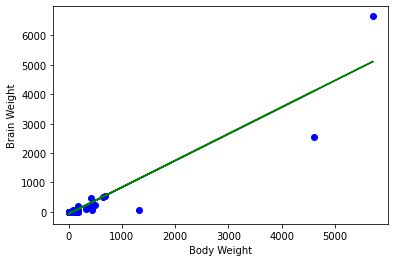

In [ ]:
#2.Chart the original data and the equation on the chart.
plt.scatter(A,B,color='blue')
plt.plot(A,regressor2.predict(A),color='green')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.show()

In [ ]:
#3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
print(regressor2.score(A,B))

0.8724784697549026


Here R2 score is **0.8724** which is greater than 0.8 so the equation is good fit for data

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df3 = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df3.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
M = df3[["Sex", "Rank", "Year", "Degree", "YSdeg"]]
N = df3[['Salary']]

In [31]:
from sklearn.linear_model import LinearRegression

regressor3 = LinearRegression()
regressor3.fit(M,N)

LinearRegression()

In [32]:
#1.Find the linear regression equation for this data using columns 1-5 to column 6.
r_i3 = regressor3.intercept_
r_c3 = regressor3.coef_

print('Linear Regression Equation: y = ',r_c3[0],'+',r_i3[0])

Linear Regression Equation: y =  [ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.14654725559


The equation for columns ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to Salary:           
                                           **[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.14654725559**

In [ ]:
#2.Find the selection of columns with the best  R2  score
salary_discrim_cols = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']

def lin_reg_wrt_focus(salary_discrim_cols, df3, focus='Salary'):
  input_cols = df3[salary_discrim_cols]
  focus_output = df3[focus]
  regr_sd = linear_model.LinearRegression()
  regr_sd.fit(input_cols, focus_output)
  return regr_sd.score(input_cols, focus_output)

import itertools as it
def get_combos(cols):
  return [it.combinations(cols, n + 1) for n in range(len(cols))]

combos = get_combos(salary_discrim_cols)

def all_combo_scores(combos, df3, focus='Salary'):
  combo_scores = {}
  for m in range(len(list(combos))):
    for n in list(combos[m]):
      combo_scores[lin_reg_wrt_focus(list(n), df3, focus)] = n
  return combo_scores

combo_scores = all_combo_scores(combos, df3)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335426, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485596, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264597, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153613, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.7525360539274633, ('Rank',)),
 (0.6311597502907436, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533503, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180405, ('Sex', 'Year', 

R2 score including all feature = **0.8547**,        
                      But there is two dominant factors "Rank" & "Year" itself scores **0.8436**

In [ ]:
#3.Report whether sex is a factor in salary.

Sex on its own has a score very close to zero **0.063898925832**, indicating that it has no direct influence on salary.